# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Irfan Hanif Indranegara
- **Email:** irfanhanif164@gmail.com
- **ID Dicoding:** irfan_haniff

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda dalam setahun?
- Apa faktor-faktor yang mempengaruhi jumlah penggunaan sepeda setiap hari?

## Import Semua Packages/Library yang Digunakan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import ExcelFile

## Data Wrangling

### Gathering Data

In [27]:
day_data = pd.read_csv('/content/drive/MyDrive/Dataset/day.csv')
hour_data = pd.read_csv('/content/drive/MyDrive/Dataset/hour.csv')

print("Data Harian:")
print(day_data.head())

print("\nData Per Jam:")
print(hour_data.head())

Data Harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data Per Jam

### Assessing Data

In [28]:
# Informasi dasar tentang dataset harian
print(day_data.info())
print(day_data.describe())

# Informasi dasar tentang dataset per jam
print(hour_data.info())
print(hour_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

### Cleaning Data

In [29]:
# Memeriksa nilai yang hilang pada data harian
print(day_data.isnull().sum())

# Memeriksa nilai yang hilang pada data per jam
print(hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Combining Data

In [30]:
# Menggabungkan data harian dengan data per jam berdasarkan kolom dteday
combined_data = pd.merge(hour_data, day_data, on='dteday', suffixes=('_hour', '_day'))

# Melihat lima baris pertama dari data yang telah digabungkan
print(combined_data.head())


   instant_hour      dteday  season_hour  yr_hour  mnth_hour  hr  \
0             1  2011-01-01            1        0          1   0   
1             2  2011-01-01            1        0          1   1   
2             3  2011-01-01            1        0          1   2   
3             4  2011-01-01            1        0          1   3   
4             5  2011-01-01            1        0          1   4   

   holiday_hour  weekday_hour  workingday_hour  weathersit_hour  ...  \
0             0             6                0                1  ...   
1             0             6                0                1  ...   
2             0             6                0                1  ...   
3             0             6                0                1  ...   
4             0             6                0                1  ...   

   weekday_day  workingday_day  weathersit_day  temp_day  atemp_day   hum_day  \
0            6               0               2  0.344167   0.363625  0.805833

## Exploratory Data Analysis (EDA)

### Explore Descriptive Statistics

In [31]:
# Statistik deskriptif untuk data harian
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [32]:
# Statistik deskriptif untuk data per jam
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Explore Data Distribution

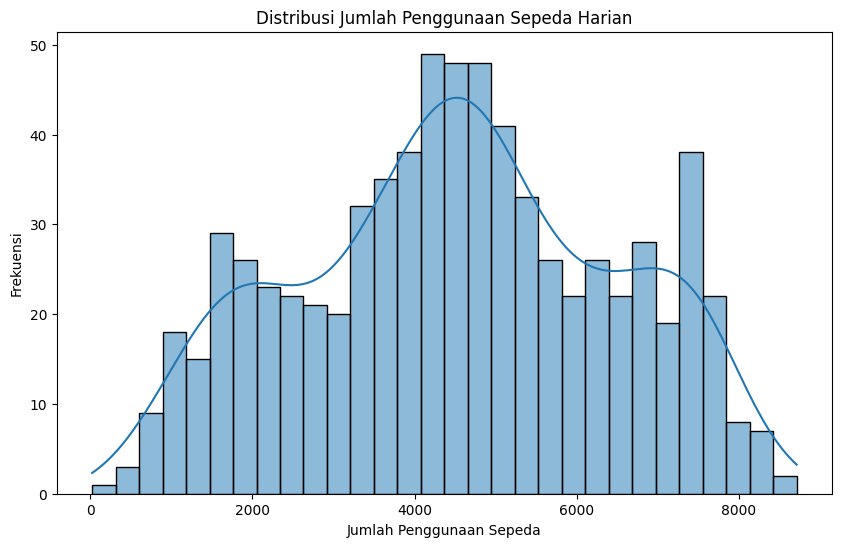

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi jumlah penggunaan sepeda harian
plt.figure(figsize=(10, 6))
sns.histplot(day_data['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penggunaan Sepeda Harian')
plt.xlabel('Jumlah Penggunaan Sepeda')
plt.ylabel('Frekuensi')
plt.show()

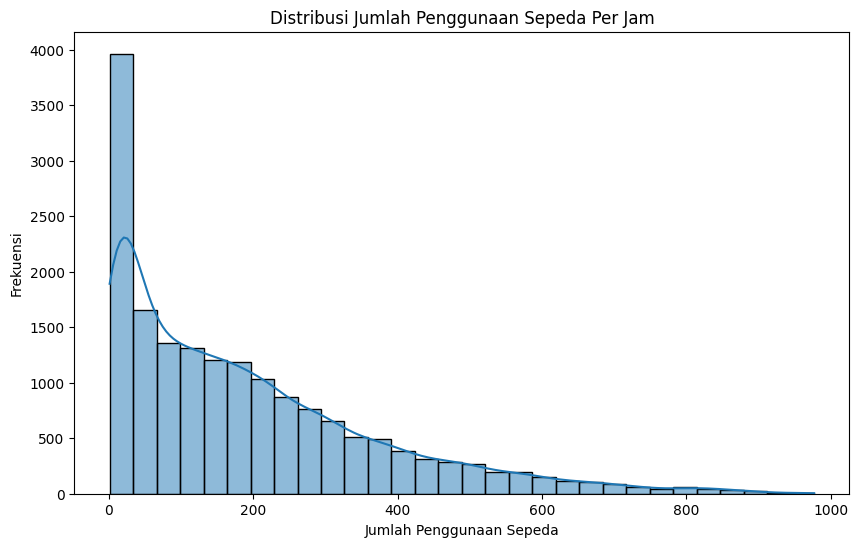

In [34]:
# Distribusi jumlah penggunaan sepeda per jam
plt.figure(figsize=(10, 6))
sns.histplot(hour_data['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penggunaan Sepeda Per Jam')
plt.xlabel('Jumlah Penggunaan Sepeda')
plt.ylabel('Frekuensi')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

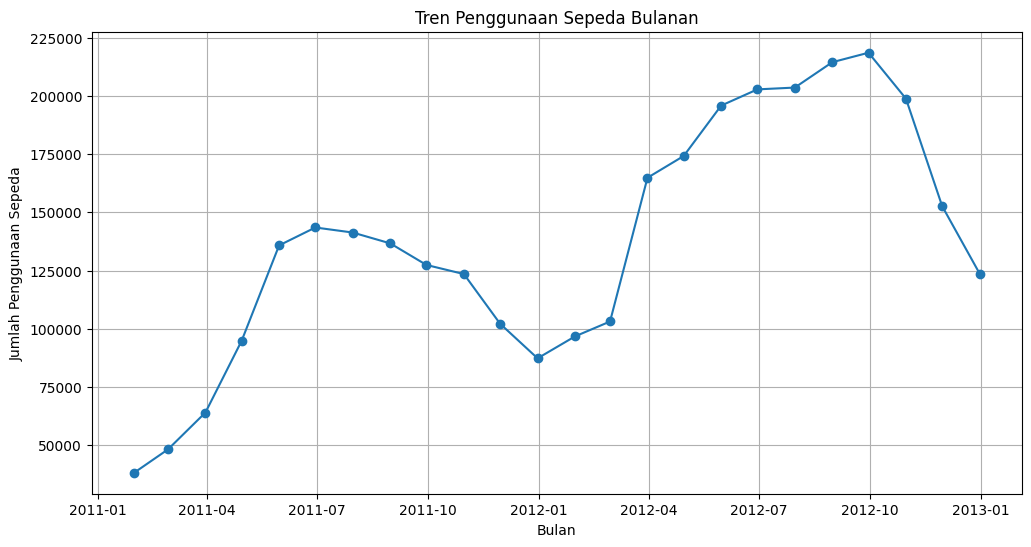

In [35]:
# Mengubah kolom tanggal menjadi tipe datetime untuk data harian
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Mengelompokkan data harian berdasarkan bulan untuk melihat tren
day_data.set_index('dteday', inplace=True)
monthly_usage = day_data.resample('M').sum()

# Visualisasi tren penggunaan sepeda bulanan
plt.figure(figsize=(12, 6))
plt.plot(monthly_usage.index, monthly_usage['cnt'], marker='o')
plt.title('Tren Penggunaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.grid(True)
plt.show()

### Pertanyaan 2:

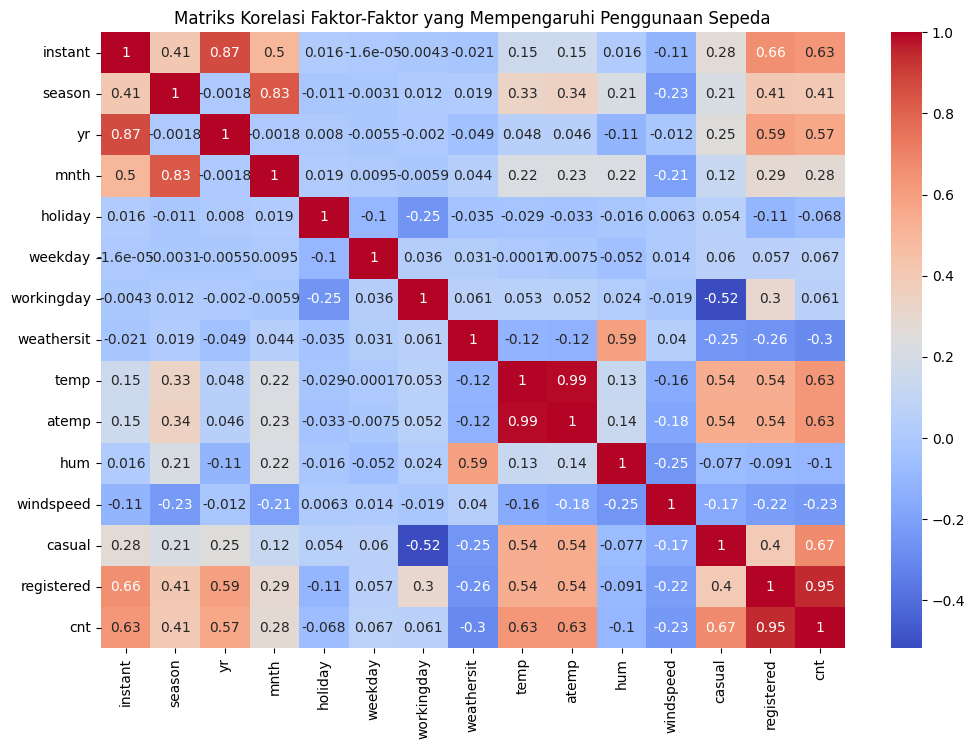

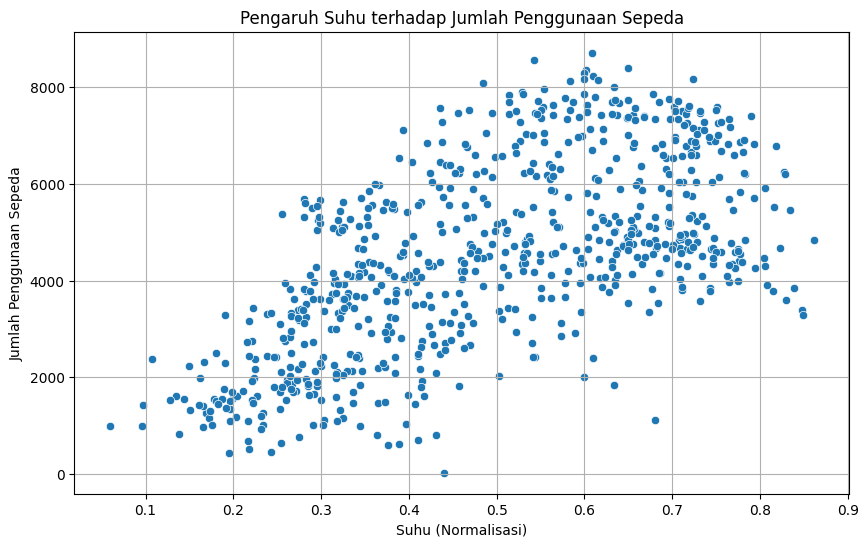

In [36]:
# Visualisasi korelasi
plt.figure(figsize=(12, 8))
correlation_matrix = day_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Faktor-Faktor yang Mempengaruhi Penggunaan Sepeda')
plt.show()

# Scatter plot untuk faktor yang paling berpengaruh
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Pengaruh Suhu terhadap Jumlah Penggunaan Sepeda')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.grid(True)
plt.show()


## Conclusion

- Tren penggunaan sepeda dalam setahun menunjukkan adanya variasi musiman dengan puncak penggunaan pada bulan-bulan tertentu.
- Faktor-faktor yang mempengaruhi jumlah penggunaan sepeda termasuk suhu, yang memiliki korelasi positif kuat dengan jumlah penggunaan sepeda. Artinya, semakin hangat suhu, semakin banyak sepeda yang digunakan.